<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 우선 머신러닝 모델링을 위한 코딩을 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 무작정 코딩을 진행해봅니다.
- Happy 데이터를 대상으로 모델링를 진행합니다.
- LinearRegression 알고리즘을 사용합니다.
- 다양한 방법으로 모델 성능을 평가합니다.

# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/income_happy.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [3]:
# 상위 몇 개 행 확인
data.head()

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398


In [4]:
# 하위 몇 개 행 확인
data.tail()

,income,happiness
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664
497,4.530545,3.710193


In [5]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   income     498 non-null    float64
 1   happiness  498 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
# 데이터 크기 확인
data.shape

(498, 2)

In [7]:
# 기초통계량 확인
data.describe()

,income,happiness
count,498.000000,498.000000
mean,4.466902,3.392859
std,1.737527,1.432813
min,1.506275,0.266044
25%,3.006256,2.265864
50%,4.423710,3.472536
75%,5.991913,4.502621
max,7.481521,6.863388


In [8]:
# 상관관계 확인
data.corr()

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


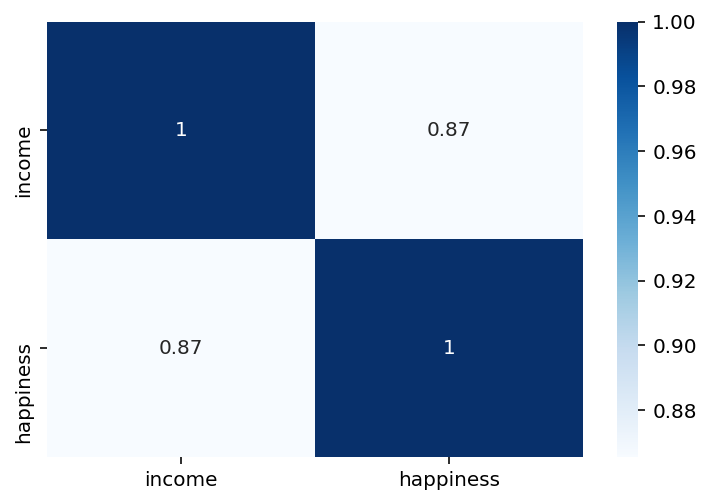

In [26]:
# 상관관계 시각화
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) x, y 분리**

In [9]:
# target 확인
target = 'happiness'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target]

**2) 학습용, 평가용 데이터 분리**

In [10]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=2022)

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

- 모델: LinearRegression

In [12]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [13]:
# 2단계: 선언하기
model = LinearRegression()

In [14]:
# 3단계: 학습하기
model.fit(x_train, y_train)

LinearRegression()

In [15]:
# 4단계: 예측하기
y_pred = model.predict(x_test)

In [24]:
# 실제값(Actual)
y_test.values

array([3.50960469, 1.41503466, 3.90117033, 5.13545532, 2.86127444,
       3.15636744, 3.68853952, 5.38147874, 0.68809058, 2.84781684,
       2.67988732, 4.63344105, 2.1918337 , 4.28799968, 4.72098734,
       5.59639827, 1.35737314, 5.13240147, 4.50344538, 2.57617631,
       0.77128657, 2.29570014, 1.98180991, 2.96732327, 1.35331734,
       1.61922613, 5.36244826, 5.02995166, 1.50221163, 2.96216821,
       2.32169769, 2.35120247, 3.56790523, 4.60011476, 2.82119264,
       1.90713683, 2.71449804, 4.12164775, 2.39167752, 2.15269843,
       4.68281699, 4.28430556, 3.42691165, 3.70343793, 0.99291737,
       3.99041589, 3.02691818, 3.17540615, 4.07820884, 3.80297363,
       4.50115834, 3.69134819, 3.47649914, 3.94101932, 3.55460032,
       3.05637665, 0.68584887, 3.51489178, 5.9142477 , 1.96563593,
       4.31713316, 3.73794161, 2.97791672, 4.13077827, 3.45310274,
       5.21140132, 0.43817157, 4.55321655, 5.68375056, 3.96103277,
       4.83350643, 5.74373608, 5.23170297, 4.39159298, 0.96852

In [25]:
# 예측값(Predicted)
y_pred

array([1.82678376, 2.60606979, 4.2922346 , 4.67198332, 1.75689115,
       2.96670751, 4.26014062, 5.00254419, 1.29553139, 1.66219973,
       2.47653673, 4.53929477, 1.65542533, 4.05216334, 5.33692423,
       5.36787588, 1.50723559, 5.10345565, 5.56132786, 2.82314254,
       1.74180398, 3.21473611, 1.29971517, 1.62733529, 1.43195746,
       2.05947983, 5.22880917, 5.35338359, 1.2964439 , 1.82058814,
       2.92770999, 1.99854352, 3.67828706, 3.89130517, 2.1007969 ,
       3.41358366, 2.64339584, 5.28471546, 2.84763923, 2.04032607,
       5.40039816, 4.73326058, 4.83505695, 4.02150143, 1.73651398,
       3.55973488, 2.69953879, 3.5111682 , 4.03095699, 2.78649893,
       4.07769917, 3.25432184, 2.8140888 , 3.83104938, 3.61200028,
       2.63566152, 1.65567764, 3.9932696 , 5.099947  , 2.40268306,
       4.86630182, 3.51629233, 2.96773221, 3.73044496, 2.48890523,
       5.1382282 , 1.5172833 , 4.28070085, 4.94132844, 1.87316051,
       4.109645  , 4.29319289, 5.36688221, 3.35724158, 1.28464

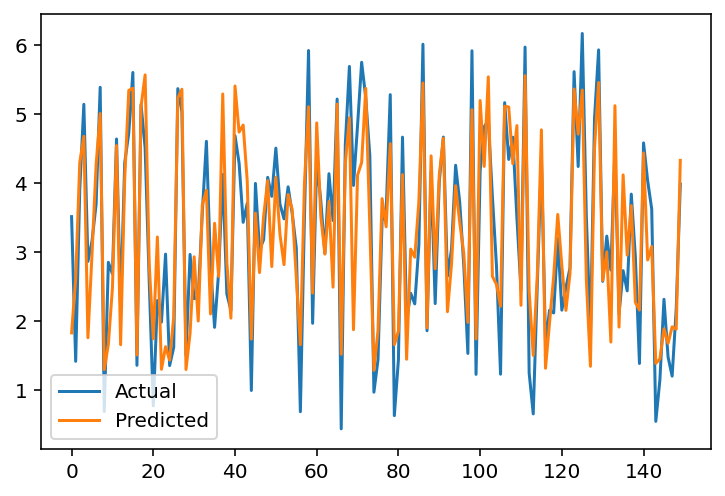

In [23]:
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

**1) MAE(Mean Absolute Error)**

In [16]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
mean_absolute_error(y_test, y_pred)

0.5466885866485439

**2) MSE(Mean Squred Error)**

In [17]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
mean_squared_error(y_test, y_pred)

0.45061240324267904

**3) RMSE(Root Mean Squred Error)**

In [18]:
# 모듈 불러오기


# 성능 평가
mean_squared_error(y_test, y_pred)**0.5

0.671276696484154

**4) MAPE(Mean Absolute Percentage Error)**

In [19]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
mean_absolute_percentage_error(y_test, y_pred)

0.24986813057928706

**5) R2-Score**

In [20]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
r2_score(y_test, y_pred)

0.7756709291514665